# RFM Analysis Homework

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset under study contains credit card transactions from the State of Oklahoma. It includes information on purchases made through the purchase card programs administered by the state and higher educational institutions. The purchase card information is updated monthly after the end of every month. As such, July information is added in August, August in September, and so on and so forth.

In a brief, here's the data description:
- Dataset contains around 440k credit card transactions.
- Each row in the dataset refers to a credit card transaction by a cardholder.
- Each cardholder belongs to an agency.
- Each transaction has the following information:
    - cardholder name
    - agency
    - amount
    - transaction date
    - merchant name (vendor)
    - merchant category
    - description of the expense

## 1. Load and clean the dataset.
Hints:  
a. Transaction date and posted date should be in datetime format  
b. Create a "full name" column  
c. Do not include transactions made by agencies (customer name = agency)  
d. Check for outliers (negative amount, refunds?)  
## 2. Perform an RFM analysis and identify key customer segments (assume that the current date is 2014-07-01).   
Hints:   
a. In this case, we expect a one-to-one relationship between the customers and transactions (i.e. every swipe of the credit card is 1 transaction).  
b. Use quartiles  
## 3. Provide some key insights and recommendations to encourage customers to spend more with the credit cards.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and clean the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/5.8.5 Home Assignment/res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv',
                   parse_dates=['Transaction Date', 'Posted Date'])

In [4]:
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


## 1. Load and clean the dataset.
  
a. Create a "full name" column  
b. Do not include transactions made by agencies (customer name = agency)  
c. Check for outliers (negative amount, refunds?)

In [5]:
# full name column
df['full_name'] = df['Cardholder Last Name'] + ', ' + df['Cardholder First Initial']


In [6]:
# remove agency (Do not include transactions made by agencies (customer name = agency))
# df = df[df['Agency Number'].astype(str)!=df[_____________]]
df = df[df['Agency Number'].astype(str)!=df['Cardholder Last Name']]
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),full_name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,"Mason, C"
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,"Mason, C"
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,"Massey, J"
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS","Massey, T"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...","Mauro-Herrera, M"


In [7]:
# remove negative amounts
df = df[df['Amount']>0]

# RFM Analysis

In [8]:
import datetime

current_date = datetime.datetime(2014, 7, 1)
current_date

datetime.datetime(2014, 7, 1, 0, 0)

### Recency

In [9]:
# get max transaction date per customer
# df_latest_invoice = df.groupby('full_name')['Transaction Date'].___________()
df_latest_invoice = df.groupby('full_name')['Transaction Date'].max()

In [10]:
# get number of days between latest invoice date and current date
# .dt.days means that we only get the actual days (not decimal)
# df_recency = (current_date - ____________).dt.days
df_recency = (current_date - df_latest_invoice).dt.days
df_recency.head()

full_name
AARON, B    43
ACREE, T     7
ADAMS, C    78
ADAMS, K    13
ADAMS, S    32
Name: Transaction Date, dtype: int64

### Frequency

In [11]:
# get frequency (count)
df_frequency = df.groupby('full_name')['full_name'].count()

### Monetary

In [12]:
# get the total amount (sum of all amounts)
df_monetary = df.groupby('full_name')['Amount'].sum()

## RFM Scores

We now merge these tables into a single dataframe. We put each series together in a dictionary and use `pd.DataFrame`

In [13]:
df_rfm = pd.DataFrame({'recency':df_recency, 'frequency':df_frequency, 'monetary':df_monetary})
df_rfm.head(20)

,recency,frequency,monetary
full_name,,,
"AARON, B",43,3,1390.00
"ACREE, T",7,85,27991.45
"ADAMS, C",78,23,1054.71
"ADAMS, K",13,68,8067.13
"ADAMS, S",32,31,2937.56
"ADE, D",5,56,12419.25
"ADKINS, M",18,1,11.86
"ADMIRE, A",7,96,11259.00
"ADUDDELL, D",18,12,8280.00


#### Calculate RFM scores. Use quantiles (0.25, 0.50, 0.75) to map the scores from 1 to 4

In [16]:
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,recency,frequency,monetary
0.25,5.0,12.0,2229.170
0.50,14.0,34.0,7874.830
0.75,54.0,89.0,24446.665


Using the quantiles function, we can get our thresholds for segmentation.

1. For recency score (lower is better):
- Score = 1; quantile between 0-0.25
- Score = 2; quantile between 0.25-0.5
- Score = 3; quantile between 0.5-0.75
- Score = 4; quantile between 0.75 - 1

<br>  
2. For frequency and monetary score (higher is better):
- Score = 1; quantile between 0.75 - 1
- Score = 2; quantile between 0.5-0.75
- Score = 3; quantile between 0.25-0.5
- Score = 4; quantile between 0-0.25

<br>  

#### Recency Score

In [17]:
# create a dictionary with the recency quantiles
recency_dict = quantiles['recency'].to_dict()
recency_dict

{0.25: 5.0, 0.5: 14.0, 0.75: 54.0}

In [ ]:
# create a function to calculate recency score
def recency_score(recency, recency_dict):
    if recency <= recency_dict[0.25]:
        # recency_score = 1 if recency is between 0-0.25 quantile
        return '1'
    elif recency <= recency_dict[0.5]:
        # recency_score = 2 if recency is between 0.25-0.5 quantile
        return '2'
    elif recency <= recency_dict[0.75]:
        # recency_score = 3 if recency is between 0.5-0.75 quantile
        return '3'
    else:
        # recency_score = 4 if recency is between 0.75-1 quantile
        return '4'

df_rfm['recency_score'] = df_rfm['recency'].apply(recency_score, args=(recency_dict,))
df_rfm.head()

### Frequency Score

In [19]:
# create a dictionary with the frequency quantiles
frequency_dict = quantiles['frequency'].to_dict()
frequency_dict

{0.25: 12.0, 0.5: 34.0, 0.75: 89.0}

In [ ]:
# create a function to calculate frequency score
def frequency_score(frequency, frequency_dict):
    if frequency <= frequency_dict[0.25]:
        # frequency_score = 4 if frequency is between 0-0.25 quantile
        return '4'
    elif frequency <= frequency_dict[0.5]:
        # frequency_score = 3 if frequency is between 0.25-0.5 quantile
        return '3'
    elif frequency <= frequency_dict[0.75]:
        # frequency_score = 2 if frequency is between 0.5-0.75 quantile
        return '2'
    else:
        # frequency_score = 1 if frequency is between 0.75-1 quantile
        return '1'

df_rfm['frequency_score'] = df_rfm['frequency'].apply(frequency_score, args=(frequency_dict,))
df_rfm.head()

### Monetary Score

In [21]:
# create a dictionary with the monetary quantiles
monetary_dict = quantiles['monetary'].to_dict()
monetary_dict

{0.25: 2229.17, 0.5: 7874.830000000001, 0.75: 24446.665}

In [ ]:
# create a function to calculate monetary score
def monetary_score(monetary, monetary_dict):
    if monetary <= monetary_dict[0.25]:
        # monetary_score = 4 if monetary is between 0-0.25 quantile
        return '4'
    elif monetary <= monetary_dict[0.5]:
        # monetary_score = 3 if monetary is between 0.25-0.5 quantile
        return '3'
    elif monetary <= monetary_dict[0.75]:
        # monetary_score = 2 if monetary is between 0.5-0.75 quantile
        return '2'
    else:
        # monetary_score = 1 if monetary is between 0.75-1 quantile
        return '1'

df_rfm['monetary_score'] = df_rfm['monetary'].apply(monetary_score, args=(monetary_dict,))
df_rfm.head()

#### Concatenate the RFM Scores

In [30]:
# Concatenate the three created columns earlier
df_rfm['rfm_score'] = df_rfm['recency_score'] + df_rfm['frequency_score'] + df_rfm['monetary_score']
df_rfm.head(20)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
full_name,,,,,,,
"AARON, B",43,3,1390.00,3,4,4,344
"ACREE, T",7,85,27991.45,2,2,1,221
"ADAMS, C",78,23,1054.71,4,3,4,434
"ADAMS, K",13,68,8067.13,2,2,2,222
"ADAMS, S",32,31,2937.56,3,3,3,333
"ADE, D",5,56,12419.25,1,2,2,122
"ADKINS, M",18,1,11.86,3,4,4,344
"ADMIRE, A",7,96,11259.00,2,1,2,212
"ADUDDELL, D",18,12,8280.00,3,4,2,342


## RFM Results

Recall our RFM score segmentation:

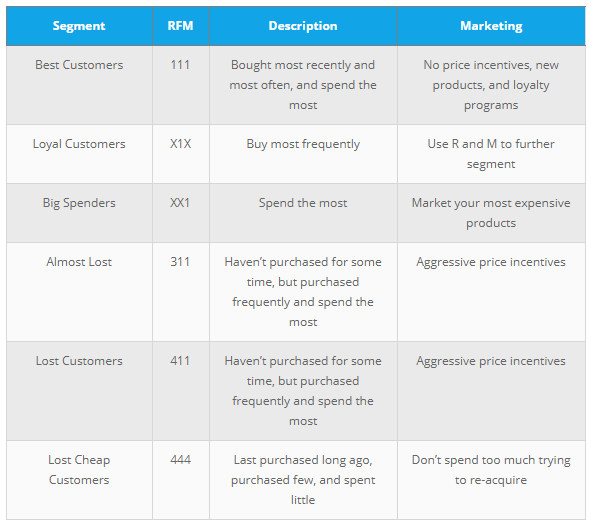

In [31]:
# let's store the segment counts in a dictionary
segment_counts = {'best_customers (111)': len(df_rfm[df_rfm['rfm_score']=='111']),
                  'loyal_customers (X1X)': len(df_rfm[df_rfm['frequency_score']=='1']),
                  'big_spenders (XX1)': len(df_rfm[df_rfm['monetary_score']=='1']),
                  'almost_lost (311)': len(df_rfm[df_rfm['rfm_score']=='311']),
                  'lost_good_customers (411)': len(df_rfm[df_rfm['rfm_score']=='411']),
                  'lost_cheap_customers (444)': len(df_rfm[df_rfm['rfm_score']=='444'])}

In [32]:
# create a dataframe
df_counts = pd.DataFrame(segment_counts.values(), index=segment_counts.keys(), columns=['counts'])
df_counts

,counts
best_customers (111),575
loyal_customers (X1X),1282
big_spenders (XX1),1298
almost_lost (311),86
lost_good_customers (411),44
lost_cheap_customers (444),621


Text(0, 0.5, '# Customers per Segment')

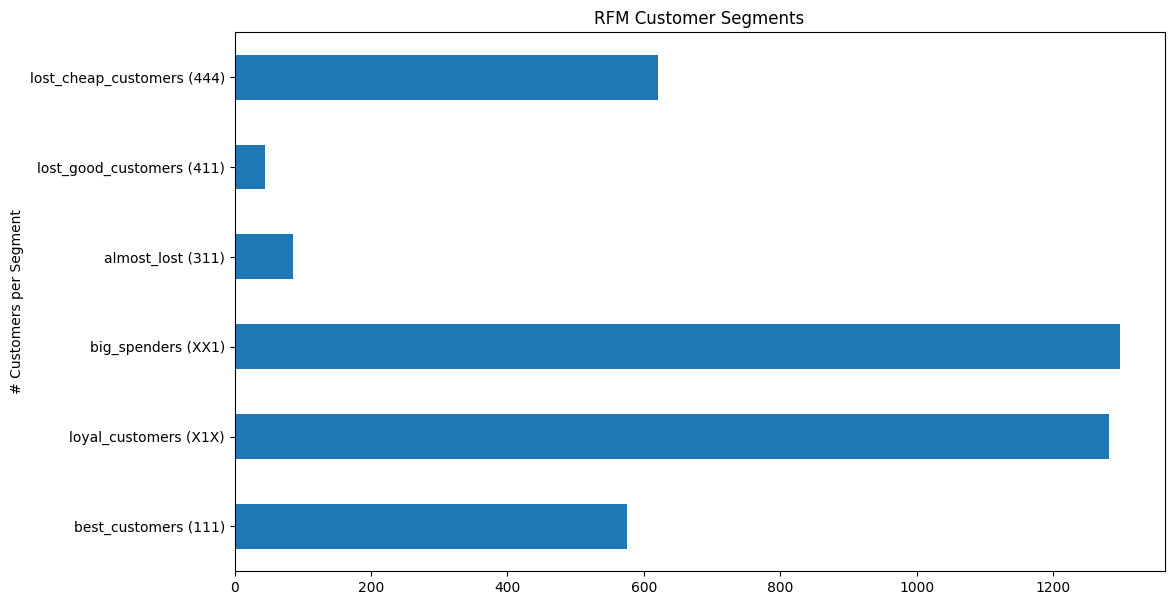

In [33]:
# plot the counts
fig, ax = plt.subplots(figsize=(12,7))
df_counts.plot(kind='barh', ax=ax, legend=False)
ax.set_title('RFM Customer Segments')
ax.set_ylabel('# Customers per Segment')

### Who are our Top Customers?

The top customers are expected to fall in the 111 segment. We filter our table and sort them by monetary value.

In [34]:
df_rfm[df_rfm['rfm_score']=='111'].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
full_name,,,,,,,
"Cardholder, e",3,1622,17865671.21,1,1,1,111
"Saltzman, D",3,852,3281746.34,1,1,1,111
"JOURNEY HOUSE TRAVEL INC, G",4,9650,3175926.70,1,1,1,111
"UNIVERSITY AMERICAN, G",4,6997,2579440.48,1,1,1,111
"LARSON, B",4,695,2192200.36,1,1,1,111
"CANTRELL, P",2,336,1769319.49,1,1,1,111
"Hines, G",3,3213,1702434.87,1,1,1,111
"Johnson, C",5,115,1477962.96,1,1,1,111
"Stroup, P",3,1860,1351728.28,1,1,1,111


#### Provide insights, recommendations, analysis. Use visualizations if necessary.

**Insights**

1. Using RFM analysis we can identify whos are best customer and target them with more direct marketing stratgy based on their purchasing behavior.
2. We can identify lost cheap customer and stratigize on how we can inrease their RFM score.

**Recommendation**
1. Product cross selling: we can identify which products are commonly purchased together, allowing them to create targeted product bundles or recommend complementary products to customers.
2. Churn Rate: By monitoring changes in RFM scores over time, businesses can identify which customers are at risk of churning and take proactive steps to prevent it.
3. Customer segmentation: we can group each customer base on theor RFM scores and identify each customer segment and tailor our marketing strategy accordingly.
